# Goal

We need to clean Loan Acquisition dataset and handle Null values with suitable imputations (Requires a lot of study and research on the domain terminalogy).

In [1]:
# Loading required libraries

import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from tqdm import tqdm_notebook as tqdm

import gc

In [2]:
acqSub = pd.read_csv('cmpnydata/acqSubset/acqSubset.csv')

In [3]:
acqSub.head()

,loanID,origChannel,sellerName,origIntRate,orgUPB,orgLoanTerm,orginationDate,firstPaymentDate,orgLTV,orgCombinedLTV,...,propType,numUnits,occType,propertyState,zipCodeShort,priMortgageInsurancePercent,prodType,coBorrowerCreditScoreAtOrigination,mortInsType,reloMortIndicator
0,100007365142,R,JPMORGAN CHASE BANK NA,8.000,75000,360,12/1999,02/2000,79.0,NaN,...,SF,1,P,PA,173,NaN,FRM,NaN,NaN,N
1,100007386460,B,JPMORGAN CHASE BANK NA,7.875,55000,180,01/2000,03/2000,69.0,NaN,...,CO,1,P,MD,208,NaN,FRM,NaN,NaN,N
2,100023274028,R,FIRST TENNESSEE BANK NATIONAL ASSOCIATION,8.000,130000,360,01/2000,03/2000,61.0,NaN,...,SF,1,P,GA,300,NaN,FRM,782.0,NaN,N
3,100026859568,C,FIRST TENNESSEE BANK NATIONAL ASSOCIATION,8.375,107000,360,02/2000,04/2000,95.0,NaN,...,SF,1,P,MO,633,25.0,FRM,NaN,1.0,N
4,100028993931,R,WELLS FARGO BANK N.A.,8.000,37000,180,02/2000,04/2000,63.0,NaN,...,SF,1,P,NC,286,NaN,FRM,NaN,NaN,N


### Checking the percentage of Null values in every column

In [12]:
nulls = pd.DataFrame(round(acqSub.isna().sum()/len(acqSub)*100,6),columns=['null_percent'])
#sns.barplot(x='index',y='null_percent',data=nulls.reset_index())
nulls[nulls['null_percent']!=0.00].sort_values('null_percent',ascending=False)

,null_percent
priMortgageInsurancePercent,77.915223
mortInsType,77.915223
coBorrowerCreditScoreAtOrigination,49.219750
orgCombinedLTV,4.173234
orgDebttoIncomeRatio,1.225507
borrowerCreditScoreAtOrigination,0.394649
numBorrowers,0.034934
orgLTV,0.000055
origIntRate,0.000027


After having a look at the results, it is evident that we need to deal with a lot of null or unknown values

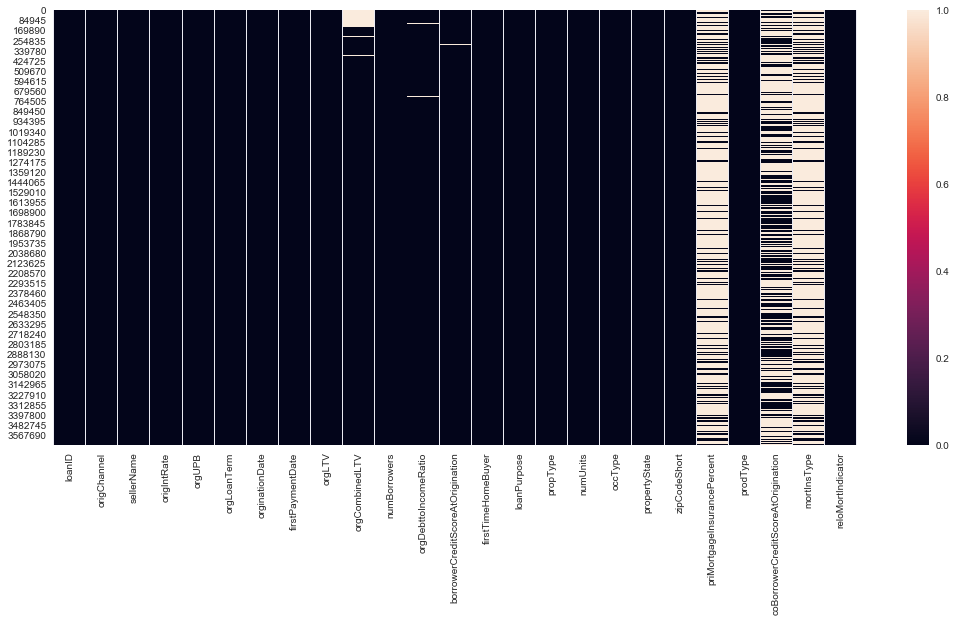

In [10]:
# A heatmap to vizualize the null values

sns.set(rc={'figure.figsize': (18,8)})
sns.heatmap(acqSub.isna())

In [11]:
# lets free up some memory

gc.collect()

41

In [17]:
#Imputations based on our understanding of Loan Performance Glossary

acqSub['orgLTV'].fillna(250,inplace=True)
acqSub['orgCombinedLTV'].fillna(250,inplace=True)
acqSub['numBorrowers'].fillna(0,inplace=True)
acqSub['orgDebttoIncomeRatio'].fillna(np.random.choice([0,75]),inplace=True)
acqSub['borrowerCreditScoreAtOrigination'].fillna(np.random.choice([175,900]),inplace=True)
acqSub['priMortgageInsurancePercent'].fillna(0,inplace=True)
acqSub['coBorrowerCreditScoreAtOrigination'].fillna(np.random.choice([175,900]),inplace=True)
acqSub['mortInsType'].fillna('None',inplace=True)
acqSub['origIntRate'].fillna(0,inplace=True)

In [18]:
gc.collect()

7

In [19]:
nulls = pd.DataFrame(round(acqSub.isna().sum()/len(acqSub)*100,6),columns=['null_percent'])
#sns.barplot(x='index',y='null_percent',data=nulls.reset_index())
nulls

,null_percent


**AWESOME! we don't have any null values now.**

In [20]:
acqSub['orginationDate'] = pd.to_datetime(acqSub['orginationDate']).apply(lambda x: int(x.strftime('%m%Y')))
acqSub['firstPaymentDate'] = pd.to_datetime(acqSub['firstPaymentDate']).apply(lambda x: int(x.strftime('%m%Y')))

In [21]:
acqSub.head()

,loanID,origChannel,sellerName,origIntRate,orgUPB,orgLoanTerm,orginationDate,firstPaymentDate,orgLTV,orgCombinedLTV,...,propType,numUnits,occType,propertyState,zipCodeShort,priMortgageInsurancePercent,prodType,coBorrowerCreditScoreAtOrigination,mortInsType,reloMortIndicator
0,100007365142,R,JPMORGAN CHASE BANK NA,8.000,75000,360,121999,22000,79.0,250.0,...,SF,1,P,PA,173,0.0,FRM,900.0,None,N
1,100007386460,B,JPMORGAN CHASE BANK NA,7.875,55000,180,12000,32000,69.0,250.0,...,CO,1,P,MD,208,0.0,FRM,900.0,None,N
2,100023274028,R,FIRST TENNESSEE BANK NATIONAL ASSOCIATION,8.000,130000,360,12000,32000,61.0,250.0,...,SF,1,P,GA,300,0.0,FRM,782.0,None,N
3,100026859568,C,FIRST TENNESSEE BANK NATIONAL ASSOCIATION,8.375,107000,360,22000,42000,95.0,250.0,...,SF,1,P,MO,633,25.0,FRM,900.0,1,N
4,100028993931,R,WELLS FARGO BANK N.A.,8.000,37000,180,22000,42000,63.0,250.0,...,SF,1,P,NC,286,0.0,FRM,900.0,None,N


In [25]:
acqSub.to_csv('cmpnydata/acqSubset/acqSubset-processed.csv')

# End
We have now saved this clean dataset as a new CSV file so that we don't need to do all this stuff again!